In [240]:
import os
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
os.getcwd()

'/Users/heosangbeom/Desktop/ML_class/project/final'

# Preprocessing

In [185]:
df = pd.read_csv("financedata.csv", encoding ="cp949")
print(df.count())

일자        160
원달러환율     150
3년물국채     152
나스닥       152
국제유가        6
S&P500    152
코스피       153
코스닥       153
dtype: int64


In [186]:
df.columns = ["date",
             "krw/usd",
             "treasury_3y",
             "nasdaq",
             "oil_price",
             "sp500",
             "kospi",
             "kosdaq"]

df
date = df[["date"]] 

print(df.count())

date           160
krw/usd        150
treasury_3y    152
nasdaq         152
oil_price        6
sp500          152
kospi          153
kosdaq         153
dtype: int64


In [187]:
df = df[1:150]
df

,date,krw/usd,treasury_3y,nasdaq,oil_price,sp500,kospi,kosdaq
1,2021-01-04,1081.62,0.16,12698.45,NaN,3700.65,2944.45,977.62
2,2021-01-05,1087.42,0.17,12818.96,NaN,3726.86,2990.57,985.76
3,2021-01-06,1085.71,0.20,12740.79,NaN,3748.14,2968.21,981.39
4,2021-01-07,1086.78,0.22,13067.48,NaN,3803.79,3031.68,988.86
5,2021-01-08,1089.48,0.24,13201.98,NaN,3824.68,3152.18,987.79
...,...,...,...,...,...,...,...,...
145,2021-07-22,1149.99,0.37,14684.60,NaN,4367.48,3250.21,1050.25
146,2021-07-23,1153.53,0.38,14836.99,NaN,4411.79,3254.42,1055.50
147,2021-07-26,1154.75,0.38,14840.71,NaN,4422.30,3224.95,1047.63
148,2021-07-27,1156.32,0.37,14660.58,NaN,4401.46,3232.53,1046.55


In [188]:
import numpy as np
from numpy import NaN, NAN, nan

In [189]:
print(df.count())

date           149
krw/usd        143
treasury_3y    144
nasdaq         143
oil_price        5
sp500          143
kospi          143
kosdaq         143
dtype: int64


array([[<AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

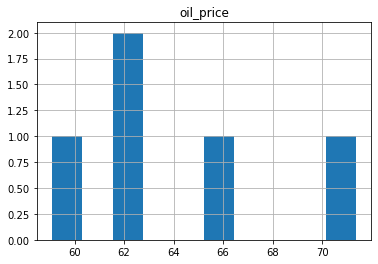

In [190]:
import matplotlib as plt
df[["oil_price"]].hist()

# 결측치 과다로 인해 변수 drop

In [200]:
df.count()

date           149
krw/usd        143
treasury_3y    144
nasdaq         143
sp500          143
kospi          143
kosdaq         143
dtype: int64

In [224]:
df = df.dropna()
df

,date,krw/usd,treasury_3y,nasdaq,sp500,kospi,kosdaq
1,2021-01-04,1081.62,0.16,12698.45,3700.65,2944.45,977.62
2,2021-01-05,1087.42,0.17,12818.96,3726.86,2990.57,985.76
3,2021-01-06,1085.71,0.20,12740.79,3748.14,2968.21,981.39
4,2021-01-07,1086.78,0.22,13067.48,3803.79,3031.68,988.86
5,2021-01-08,1089.48,0.24,13201.98,3824.68,3152.18,987.79
...,...,...,...,...,...,...,...
145,2021-07-22,1149.99,0.37,14684.60,4367.48,3250.21,1050.25
146,2021-07-23,1153.53,0.38,14836.99,4411.79,3254.42,1055.50
147,2021-07-26,1154.75,0.38,14840.71,4422.30,3224.95,1047.63
148,2021-07-27,1156.32,0.37,14660.58,4401.46,3232.53,1046.55


In [320]:
df.dtypes

date            object
krw/usd        float64
treasury_3y    float64
nasdaq         float64
sp500          float64
kospi          float64
kosdaq         float64
dtype: object

<AxesSubplot:>

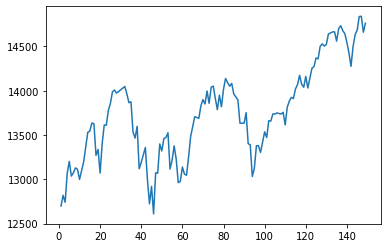

In [327]:
df["nasdaq"].plot()

### Scatter Plot

<AxesSubplot:xlabel='nasdaq', ylabel='kospi'>

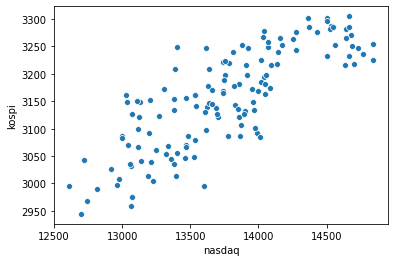

In [347]:
fig, ax = plt.subplots()
sns.scatterplot("nasdaq", "kospi", data=df)

### Correlation

AxesSubplot(0.125,0.125;0.62x0.755)


,krw/usd,treasury_3y,nasdaq,sp500,kospi,kosdaq
krw/usd,1.000000,0.696605,0.508666,0.603568,0.295493,0.277752
treasury_3y,0.696605,1.000000,0.588465,0.791266,0.617769,0.499143
nasdaq,0.508666,0.588465,1.000000,0.836775,0.808098,0.801177
sp500,0.603568,0.791266,0.836775,1.000000,0.833682,0.725518
kospi,0.295493,0.617769,0.808098,0.833682,1.000000,0.818487
kosdaq,0.277752,0.499143,0.801177,0.725518,0.818487,1.000000


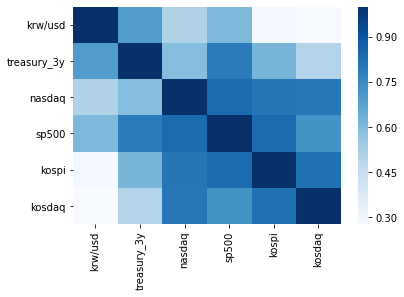

In [312]:
corr = df.corr()
print(sns.heatmap(corr, cmap="Blues"))

corr 

# correlation이 몇 초과여야 높다고 평가하는가?

# 1. Let's ARIMA (Autoregressive Integrated Moving Average)

In [297]:
# 시각화, arima 모델, acf/pacf 함수 라이브러리 호출
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## ARIMA Modeling by Features

* The (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers.

### Core Parameters

* autoregressive models: AR(p)

* moving average models: MA(q)

* mixed autoregressive moving average models: ARMA(p, q)

* integration models: ARIMA(p, d, q)

In [298]:
# feature lists
df.columns

Index(['date', 'krw/usd', 'treasury_3y', 'nasdaq', 'sp500', 'kospi', 'kosdaq'], dtype='object')

### 1) KRW/USD (원달러 환율)

                             ARIMA Model Results                              
Dep. Variable:          D.treasury_3y   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 329.200
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 18 Aug 2021   AIC                           -650.400
Time:                        00:59:53   BIC                           -638.749
Sample:                             1   HQIC                          -645.665
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0017      0.000      4.732      0.000       0.001       0.002
ar.L1.D.treasury_3y     0.8916      0.043     20.764      0.000       0.807       0.976
ma.L1.D.treasury

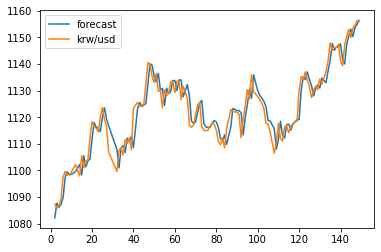

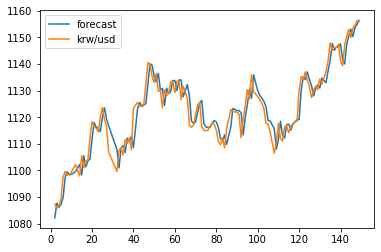

In [299]:
krw_usd = ARIMA(df[["krw/usd"]], order=(1,1,1))

krw_usd_fit = krw_usd.fit(trend='c',full_output=True, disp=1)

print(model_fit.summary())
krw_usd_fit.plot_predict()

### 2) Treasury Rate(3Y)

                             ARIMA Model Results                              
Dep. Variable:          D.treasury_3y   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 329.200
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 18 Aug 2021   AIC                           -650.400
Time:                        00:59:59   BIC                           -638.749
Sample:                             1   HQIC                          -645.665
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0017      0.000      4.732      0.000       0.001       0.002
ar.L1.D.treasury_3y     0.8916      0.043     20.764      0.000       0.807       0.976
ma.L1.D.treasury

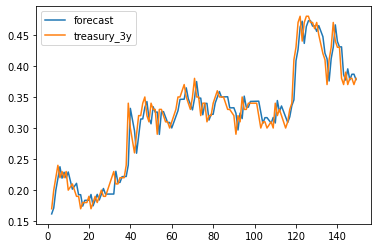

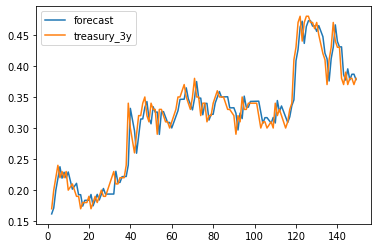

In [300]:
from statsmodels.tsa.arima_model import ARIMA

treasury = ARIMA(df[["treasury_3y"]], order=(1,1,1))

treasury_fit = treasury.fit(trend='c',full_output=True, disp=1)

print(treasury_fit.summary())

treasury_fit.plot_predict()

### 3) NASDAQ

                             ARIMA Model Results                              
Dep. Variable:               D.nasdaq   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -882.697
Method:                       css-mle   S.D. of innovations            159.400
Date:                Wed, 18 Aug 2021   AIC                           1773.394
Time:                        01:00:06   BIC                           1785.045
Sample:                             1   HQIC                          1778.129
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.0070     12.133      1.237      0.216      -8.772      38.787
ar.L1.D.nasdaq    -0.1785      0.391     -0.457      0.648      -0.944       0.587
ma.L1.D.nasdaq     0.0452      0.391

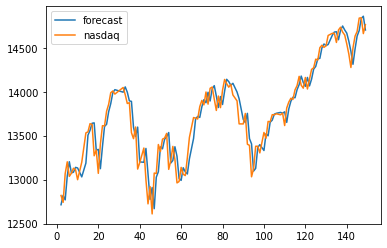

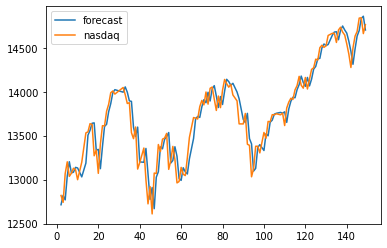

In [301]:
from statsmodels.tsa.arima_model import ARIMA

nasdaq = ARIMA(df[["nasdaq"]], order=(1,1,1))

nasdaq_fit = nasdaq.fit(trend='c',full_output=True, disp=1)

print(nasdaq_fit.summary())

nasdaq_fit.plot_predict()

### 4) S&P 500

                             ARIMA Model Results                              
Dep. Variable:                D.sp500   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -664.079
Method:                       css-mle   S.D. of innovations             31.628
Date:                Wed, 18 Aug 2021   AIC                           1336.157
Time:                        01:00:14   BIC                           1347.808
Sample:                             1   HQIC                          1340.892
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8727      0.334     14.602      0.000       4.219       5.527
ar.L1.D.sp500     0.8130      0.052     15.622      0.000       0.711       0.915
ma.L1.D.sp500    -1.0000      0.021    -

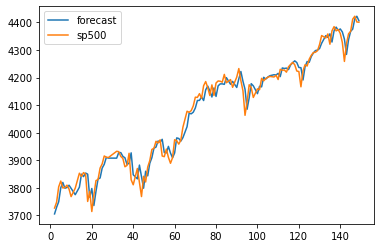

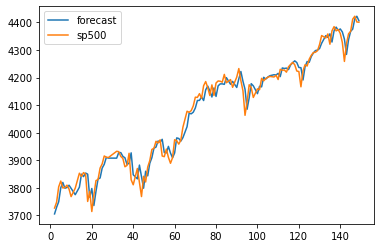

In [302]:
sp500 = ARIMA(df[["sp500"]], order=(1,1,1))

sp500_fit = sp500.fit(trend='c',full_output=True, disp=1)

print(sp500_fit.summary())

sp500_fit.plot_predict()

### 5) KOSPI

                             ARIMA Model Results                              
Dep. Variable:                D.kospi   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -666.468
Method:                       css-mle   S.D. of innovations             32.207
Date:                Wed, 18 Aug 2021   AIC                           1340.936
Time:                        01:01:12   BIC                           1352.587
Sample:                             1   HQIC                          1345.671
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8716      0.387      4.834      0.000       1.113       2.630
ar.L1.D.kospi     0.8387      0.050     16.687      0.000       0.740       0.937
ma.L1.D.kospi    -0.9999      0.021    -

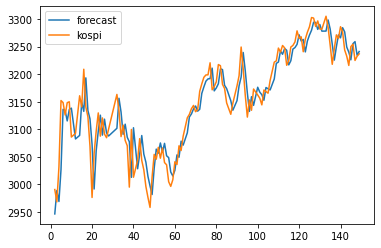

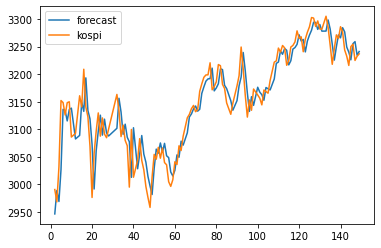

In [303]:
kospi = ARIMA(df[["kospi"]], order=(1,1,1))

kospi_fit = kospi.fit(trend='c',full_output=True, disp=1)

print(kospi_fit.summary())

kospi_fit.plot_predict()

### 6) KOSDAQ

                             ARIMA Model Results                              
Dep. Variable:               D.kosdaq   No. Observations:                  136
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -509.378
Method:                       css-mle   S.D. of innovations             10.242
Date:                Wed, 18 Aug 2021   AIC                           1026.757
Time:                        01:01:57   BIC                           1038.407
Sample:                             1   HQIC                          1031.491
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4270      0.874      0.488      0.625      -1.286       2.140
ar.L1.D.kosdaq    -0.6761      0.982     -0.689      0.491      -2.600       1.248
ma.L1.D.kosdaq     0.6683      0.989

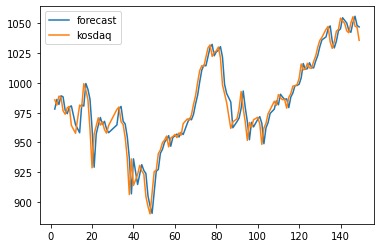

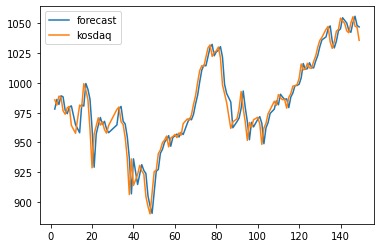

In [304]:
kosdaq = ARIMA(df[["kosdaq"]], order=(1,1,1))

kosdaq_fit = kosdaq.fit(trend='c',full_output=True, disp=1)

print(kosdaq_fit.summary())

kosdaq_fit.plot_predict()

-------
# 2. 자기상관성 함수 시각화 (ACF, PACF)

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

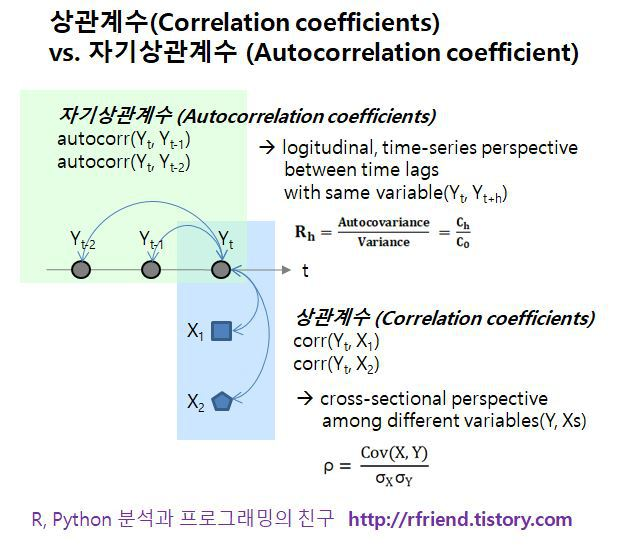


This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### ex) 원달러 환율 데이터의 자기상관성 함수 시각화

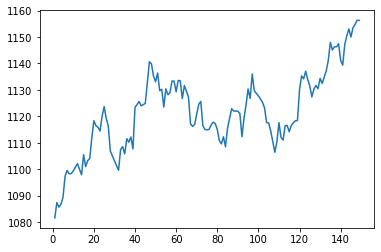

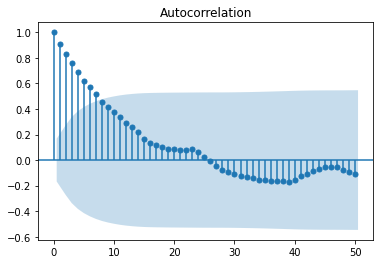

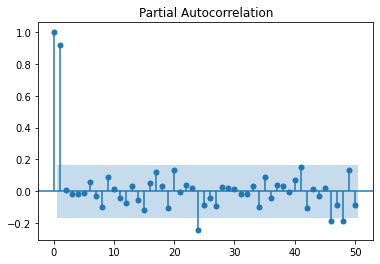

In [352]:
# Plots lags on the horizontal and the correlations on vertical axis
df["krw/usd"].plot()
plot_acf(df["krw/usd"], lags=50)
plot_pacf(df["krw/usd"], lags=50)
plt.show()